In [26]:
from pyspark import SparkConf, SparkContext
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [2]:
conf = SparkConf().setMaster('local').setAppName('RatingsHistogram')
sc = SparkContext(conf=conf)

In [19]:
header = ['user_id', 'movie_id', 'rating', 'timestamp']
df = pd.read_csv('../datasets/ml-100k/u.data', delimiter='\t')
df.head()

,196,242,3,881250949
0,186,302,3,891717742
1,22,377,1,878887116
2,244,51,2,880606923
3,166,346,1,886397596
4,298,474,4,884182806


In [20]:
lines = sc.textFile('../datasets/ml-100k/u.data')
ratings = lines.map(lambda x: x.split('\t')[2])
result = ratings.countByValue()
result

defaultdict(int, {'3': 27145, '1': 6110, '2': 11370, '4': 34174, '5': 21201})

In [24]:
for k, v in sorted(result.items()):
    print(k, v)

1 6110
2 11370
3 27145
4 34174
5 21201


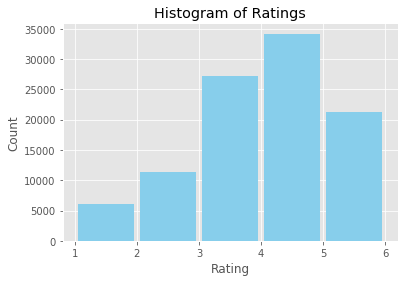

In [32]:
plt.hist(df.iloc[:, 2], bins=[1, 2, 3, 4, 5, 6], rwidth=0.9, color='skyblue')
plt.title('Histogram of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()